# Cat and Dog Image Classification
The main aim of this task is to build a CNN (convolutional neural network) model to classify the images into cats or dogs.<br>
For this task I have used Kaggle's [Dogs & Cats Images](https://www.kaggle.com/chetankv/dogs-cats-images). It contains 8000 training images and 2000 test images.

## Importing dataset from kaggle

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"divyachhoriya","key":"e290a4d81fac73060690e5bedb00b6f0"}'}

In [ ]:
#creating a directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy kaggle.json file to the directory created
! cp kaggle.json ~/.kaggle/

In [ ]:
#change permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

 97% 423M/435M [00:04<00:00, 108MB/s] 
100% 435M/435M [00:04<00:00, 93.7MB/s]


In [ ]:
!unzip dogs-cats-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

## Importing libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import cv2

In [2]:
train_dir = '/content/dog vs cat/dataset/training_set'
test_dir = '/content/dog vs cat/dataset/test_set'

In [3]:
train_img_cats = []
train_img_dogs = []
test_img_cats = []
test_img_dogs = []

In [4]:
for img in os.listdir(train_dir + '/cats'):
  img_array_train = os.path.join(train_dir + '/cats', img)
  train_img_cats.append(img_array_train)

for img in os.listdir(train_dir + '/dogs'):
  img_array_train = os.path.join(train_dir + '/dogs', img)
  train_img_dogs.append(img_array_train)

for img in os.listdir(test_dir + '/cats'):
  img_array_test = os.path.join(test_dir + '/cats', img)
  test_img_cats.append(img_array_test)

for img in os.listdir(test_dir + '/dogs'):
  img_array_test = os.path.join(test_dir + '/dogs', img)
  test_img_dogs.append(img_array_test)

In [5]:
print("Training images of cats:", len(train_img_cats))
print("Training images of dogs:", len(train_img_dogs))
print("Test images of cats:", len(test_img_cats))
print("Test images of dogs:", len(test_img_dogs))

Training images of cats: 4000
Training images of dogs: 4000
Test images of cats: 1000
Test images of dogs: 1000


In [6]:
train_img_cats

['/content/dog vs cat/dataset/training_set/cats/cat.1046.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.3121.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.1692.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.3866.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.1225.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.1930.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.2493.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.1050.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.2862.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.265.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.3285.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.508.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.1844.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.2057.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.3324.jpg',
 '/content/dog vs cat/dataset/training_set/cats/cat.1053.

In [7]:
train_img_dogs

['/content/dog vs cat/dataset/training_set/dogs/dog.3911.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.2464.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.1700.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.995.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.2415.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.3795.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.3416.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.2815.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.3569.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.1283.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.3780.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.2140.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.1172.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.555.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.657.jpg',
 '/content/dog vs cat/dataset/training_set/dogs/dog.586.jp

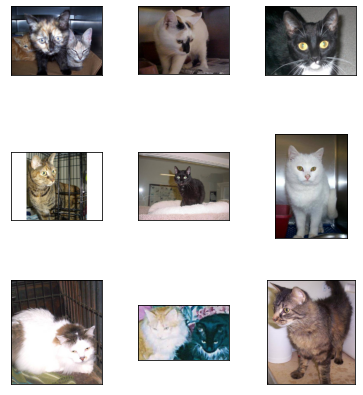

In [8]:
#plotting cat images
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv2.cvtColor(cv2.imread(train_img_cats[i]), cv2.COLOR_BGR2RGB))

plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

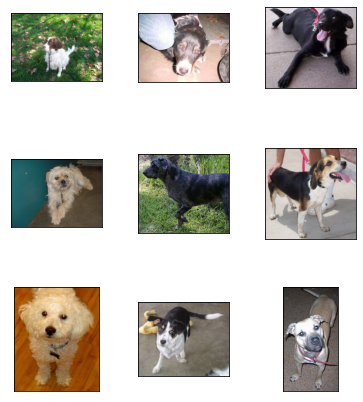

In [9]:
# plotting dog images
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv2.cvtColor(cv2.imread(train_img_dogs[i]), cv2.COLOR_BGR2RGB))

plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/content/dog vs cat/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/dog vs cat/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [14]:
cnn_model = tf.keras.Sequential([        #will create layers of network in sequence
        tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(64,64,3)),   #first convolutional layer
        #convolutional layer: extract features from input image and pass it to the next layer
        tf.keras.layers.MaxPool2D(2,2),   #first max pooling layer
        #pooling: used to reduce the dimensions of the input and feature maps while still preserving spatial invariants

        tf.keras.layers.Flatten(),   #flatten is used to convert matrix into a simple linear array
        tf.keras.layers.Dense(128, activation=tf.nn.relu),   #Hidden layer (with 128 neurons) with relu as activation function
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
______________________________________________

In [15]:
cnn_model.compile(optimizer='adam',    #figures the next guess to optimize the loss
              loss='binary_crossentropy',   #loss function: measures how accurate the model is
              metrics=['accuracy'])         #to print the accuracy of each loop while training the model

In [16]:
cnn_model.fit_generator(training_set, steps_per_epoch=200, epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
200/200 [==============================] - 38s 188ms/step - loss: 0.7135 - accuracy: 0.6044
Epoch 2/20
200/200 [==============================] - 38s 187ms/step - loss: 0.5947 - accuracy: 0.6795
Epoch 3/20
200/200 [==============================] - 38s 187ms/step - loss: 0.5762 - accuracy: 0.6984
Epoch 4/20
200/200 [==============================] - 37s 186ms/step - loss: 0.5545 - accuracy: 0.7205
Epoch 5/20
200/200 [==============================] - 37s 187ms/step - loss: 0.5454 - accuracy: 0.7214
Epoch 6/20
200/200 [==============================] - 38s 188ms/step - loss: 0.5411 - accuracy: 0.7228
Epoch 7/20
200/200 [==============================] - 37s 186ms/step - loss: 0.5324 - accuracy: 0.7337
Epoch 8/20
200/200 [==============================] - 38s 187ms/step - loss: 0.5056 - accuracy: 0.7523
Epoch 9/20
200/200 [==============================] - 37s 186ms/step - loss: 0.5099 - accuracy: 0.7448
Epoch 10/20
200/200 [==============================] - 37s 186ms/step - l

In [17]:
def predict_image(path_to_img, cnn_model):
    img = image.load_img(path_to_img, target_size=(64, 64))   
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis = 0)
    res = cnn_model.predict(img)
    if res[0][0] >= 0.5:
        prediction = 'dog'
        print("Predicted label:", prediction)
    else:
        prediction = 'cat'
        print("Predicted label:", prediction)

In [18]:
test_images = test_img_cats + test_img_dogs
print(len(test_images))

2000


In [23]:
import random
n1 = random.randint(0, 2000)
n2 = random.randint(0, 2000)
print(n1)
print(n2)

649
1293


Predicted label: cat


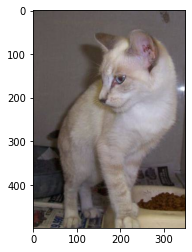

In [24]:
plt.imshow(cv2.cvtColor(cv2.imread(test_images[n1]), cv2.COLOR_BGR2RGB))
predict_image(test_images[n1], cnn_model)

Predicted label: dog


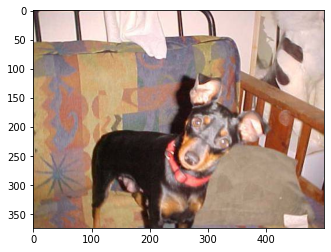

In [25]:
plt.imshow(cv2.cvtColor(cv2.imread(test_images[n2]), cv2.COLOR_BGR2RGB))
predict_image(test_images[n2], cnn_model)

Predicted label: dog


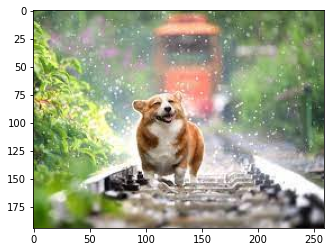

In [26]:
#random picture from google to test the model
#link to image: https://www.reddit.com/r/aww/comments/fqq0gu/cute_doggo_smiles_in_the_rain/
plt.imshow(cv2.cvtColor(cv2.imread('/content/dog.jpg'), cv2.COLOR_BGR2RGB))
predict_image('/content/dog.jpg', cnn_model)

# Summary:
Cats vs Dogs classification is a fundamental Deep Learning project that involves classifying photos as either containing a dog or cat. In this task, I developed a convolutional neural network to classify photos of dogs and cats and got an accuracy of around 0.824 on training set.

#### References:
* https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://www.analyticsvidhya.com/blog/2021/06/beginner-friendly-project-cat-and-dog-classification-using-cnn/